# FFNN Classifier (basic version)

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../iris.csv")
dfSet = df[ df['variety'] == "Setosa" ]
dfVir = df[ df['variety'] == "Virginica"] 
dfVer = df[ df['variety'] == "Versicolor"]

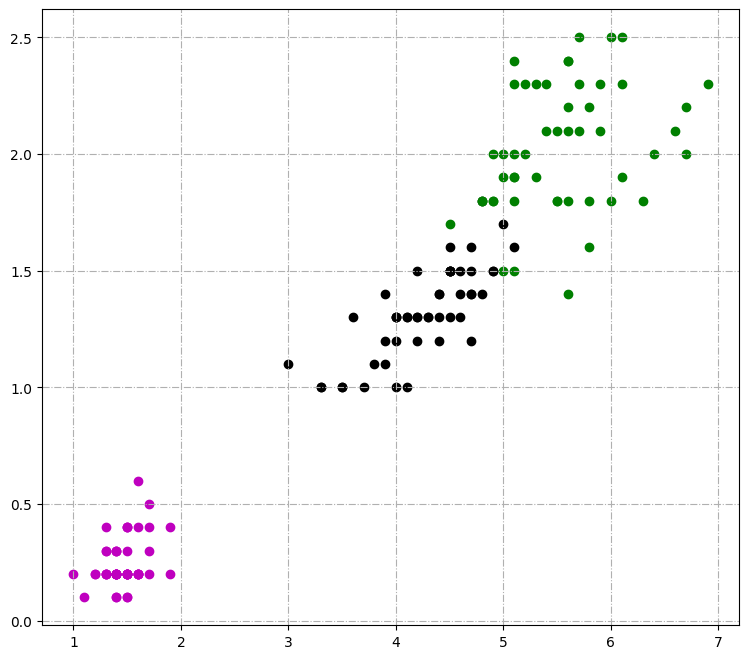

In [3]:
plt.figure(figsize=(9,8))
plt.grid(which='both', linestyle='dashdot')

plt.scatter(dfSet['petal.length'], dfSet['petal.width'], c='m')
plt.scatter(dfVer['petal.length'], dfVer['petal.width'], c='k')
plt.scatter(dfVir['petal.length'], dfVir['petal.width'], c='g')


plt.show()

In [4]:
features = ['petal.length',
            'petal.width',]
labels   = 'variety'

nazvy premennych v zmysle konvencie: vstup [x] -> vystup [y]

pd.DataFrame.map(dictionary) -> zmena na ciselnu hondotu (index)

In [5]:
x = df[features]
y = df[labels]
d = {'Setosa' : 0,
     'Virginica' : 1,
     'Versicolor' : 2}
y = y.map(d)

In [1]:
# Vizualizacia modelu: v tomto pripade nezabavne.
# Pre vizualizaciu treba pydot, obsiahnuty v graphviz.
# Odkomentovat riadku
# V pripade zaujmu treba nainstalovat package podla OS:

#!winget install graphviz
#!sudo apt install graphviz
#!brew install graphviz

#!python -m pip install pydot

model = tf.keras.models.Sequential()

for i in range(32):
     model.add(tf.keras.layers.Dense(units=64, activation='gelu'))
model.add(tf.keras.layers.Dense(units=1, activation='gelu'))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.build((32,2))
model.summary()
#tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

NameError: name 'tf' is not defined

In [7]:
nepochs = 400
history = model.fit(x,y, batch_size=32, epochs=nepochs)

Epoch 1/400
5/5 [==============================] - 8s 7ms/step - loss: 1.6473 - mae: 0.9974
Epoch 2/400
5/5 [==============================] - 0s 6ms/step - loss: 1.5682 - mae: 0.9828
Epoch 3/400
5/5 [==============================] - 0s 5ms/step - loss: 1.4149 - mae: 0.9569
Epoch 4/400
5/5 [==============================] - 0s 6ms/step - loss: 1.0339 - mae: 0.8783
Epoch 5/400
5/5 [==============================] - 0s 7ms/step - loss: 0.7086 - mae: 0.7296
Epoch 6/400
5/5 [==============================] - 0s 6ms/step - loss: 0.7019 - mae: 0.7127
Epoch 7/400
5/5 [==============================] - 0s 6ms/step - loss: 0.6905 - mae: 0.7188
Epoch 8/400
5/5 [==============================] - 0s 9ms/step - loss: 0.6637 - mae: 0.6758
Epoch 9/400
5/5 [==============================] - 0s 8ms/step - loss: 0.6797 - mae: 0.7022
Epoch 10/400
5/5 [==============================] - 0s 5ms/step - loss: 0.6724 - mae: 0.6789
Epoch 11/400
5/5 [==============================] - 0s 6ms/step - loss: 0.6735 

numpy magic -> chceme jeden stlpec {pq} obsahujuci vsetky body mriezky {p} x {q}

In [8]:
#p = np.linspace(4.1, 8.2, 1000)
#q = np.linspace(1.9, 4.6, 500)
p = np.linspace(0.9, 7.1, 1500) #r
q = np.linspace(0.0, 2.6, 500)  #s
pq = np.zeros((len(p)*len(q), 2))
for i in range(len(q)):
    for j in range(len(p)):
        pq[j + i*len(p)] = [p[j], q[i]]

In [9]:
# lebo DataFrame funguje, povodny numpy.ndarray protestoval
out = model.predict(pd.DataFrame(pq)) 

23438/23438 [==============================] - 52s 2ms/step


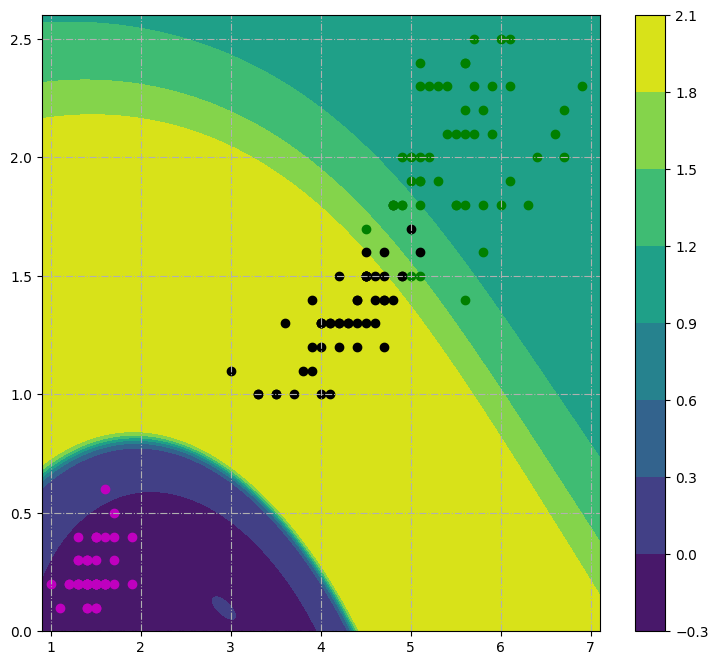

In [10]:
P, Q = np.meshgrid(p,q)

plt.figure(figsize=(9,8))
plt.grid(which='both', linestyle='dashdot')

plt.contourf(P, Q, np.reshape((out), (500,1500)))
plt.colorbar()

plt.scatter(dfSet['petal.length'], dfSet['petal.width'], c='m')
plt.scatter(dfVer['petal.length'], dfVer['petal.width'], c='k')
plt.scatter(dfVir['petal.length'], dfVir['petal.width'], c='g')


plt.show()


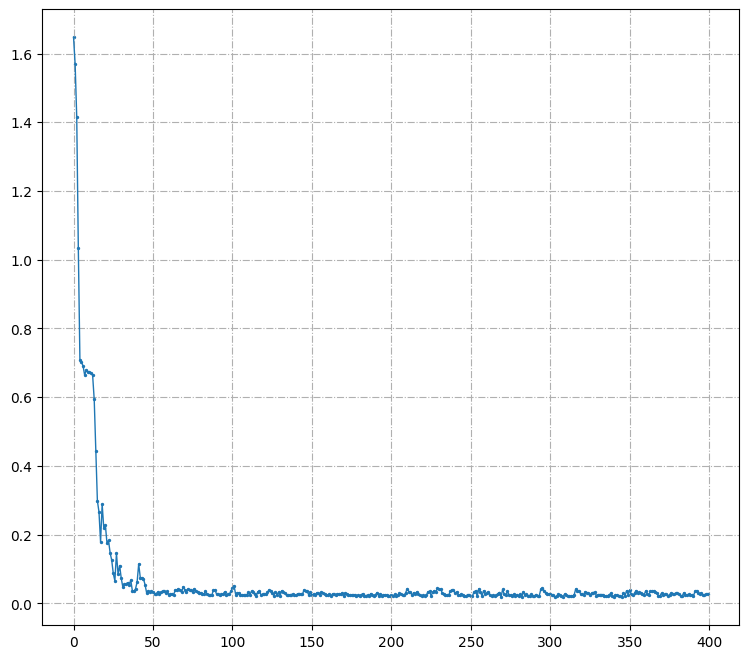

In [11]:
plt.figure(figsize=(9,8))
plt.grid(which='both', linestyle='dashdot')

plt.scatter(range(nepochs), history.history['loss'],s=2)
plt.plot(range(nepochs), history.history['loss'],linewidth=1)

plt.show()